In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Info: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/inst/Perf_HeAr.html

Manual: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/doc/manual/EFOSC2manual_v4.2.pdf

Grism #11

In [2]:
data = fits.open('data_eso36_efosc/EFOSC_spec_HeAr227_0005.fits')[0]

<ipython-input-3-89877954d32b>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')


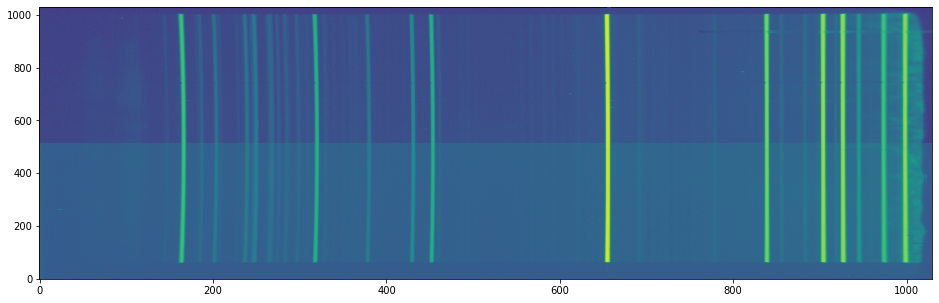

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')

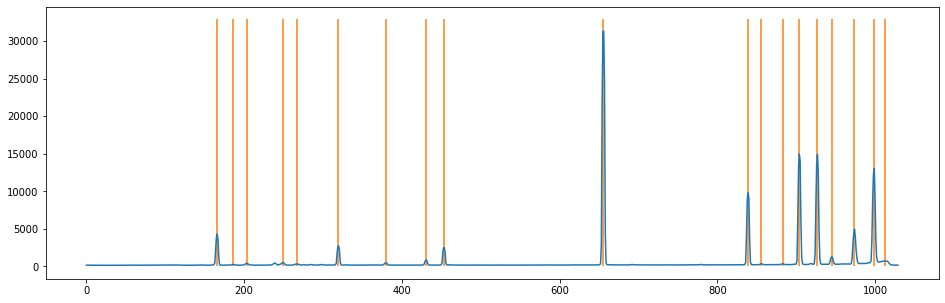

In [4]:
spectrum = np.median(data.data.T, axis=0)
peaks, _ = find_peaks(spectrum, prominence=80, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(1, figsize=(16,5))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [5]:
c = Calibrator(peaks_refined,
               min_wavelength=3300.,
               max_wavelength=7500.,
               num_pix=len(spectrum))

c.set_fit_constraints(num_slopes=10000,
                      range_tolerance=500.,
                      polydeg=4,
                      xbins=1000,
                      ybins=1000)

c.add_atlas(["Ar", "He"])

INFO:rascal.calibrator:Peak at: 3909.390193669644 A
INFO:rascal.calibrator:Peak at: 4024.477231955449 A
INFO:rascal.calibrator:- matched to 4026.1708984375 A
INFO:rascal.calibrator:Peak at: 4120.792480494035 A
INFO:rascal.calibrator:- matched to 4120.79248046875 A
INFO:rascal.calibrator:Peak at: 4387.900390627596 A
INFO:rascal.calibrator:- matched to 4387.900390625 A
INFO:rascal.calibrator:Peak at: 4491.799495075509 A
INFO:rascal.calibrator:Peak at: 4801.449621674318 A
INFO:rascal.calibrator:Peak at: 5147.401502759392 A
INFO:rascal.calibrator:Peak at: 5427.420423237398 A
INFO:rascal.calibrator:Peak at: 5546.2521770557105 A
INFO:rascal.calibrator:Peak at: 6416.235351510684 A
INFO:rascal.calibrator:- matched to 6416.2353515625 A
INFO:rascal.calibrator:Peak at: 6937.582519616925 A
INFO:rascal.calibrator:- matched to 6937.58251953125 A
INFO:rascal.calibrator:Peak at: 6978.805118568084 A
INFO:rascal.calibrator:Peak at: 7044.493180946364 A
INFO:rascal.calibrator:Peak at: 7097.007105331577 A


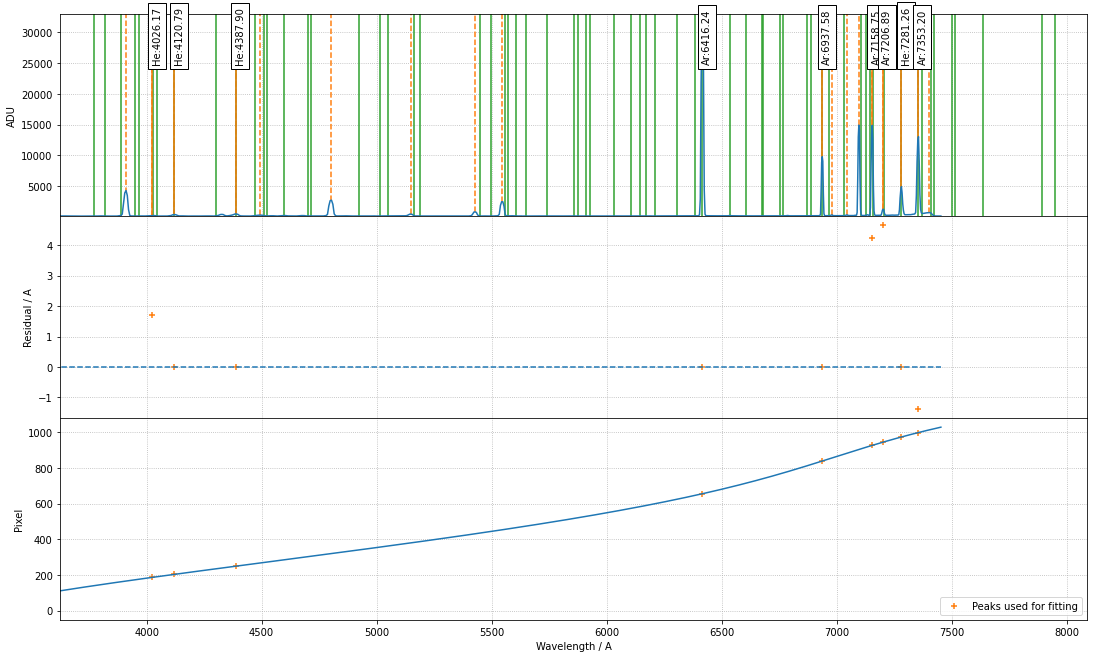

Stdev error: 2.769559234901846e-08 A
Peaks utilisation rate: 26.31578947368421%


In [6]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=2000,
                                                candidate_weighted=True,
                                                hough_weight=1.0,
                                                filter_close=True)

c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False, tolerance=5.0, renderer='notebook')


rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))